## Prueba de Conocimientos Ciencia de Datos 01

En este notebook puedes utilizar todas las librerias con las que hemos trabajado.

### Ejercicio 1:

_**url** = https://www.20minutos.es/_

Vamos a hacer Web Scraping de las primeras 3 paginas de las categorias de noticias: **Ciencia**, **Deporte**, **Gente**, **Economía**, **Madrid** y **Opinión**.

Y de cada noticia/articulo vamos a obtener:

- **Titulo**
- **Hora**
- **Fecha**
- **Autor**
- **Texto completo**
- **Categoria (columna objetivo)**

**Sustituir con NaN's en el caso de que no se pueda extraer alguno de esos datos anteriores.**

Genera un DataFrame con esta información y guardalo en el archivo **`20minutos_1.csv`**.

In [2]:
# Importamos las librerias/componentes necesarios

from bs4 import BeautifulSoup
import requests
from time import sleep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.corpus import stopwords

In [6]:
# Url de las categorías solicitadas
enlaces_categorias= ['https://www.20minutos.es/ciencia/',
                    'https://www.20minutos.es/deportes/',
                    'https://www.20minutos.es/gente/',
                    'https://www.20minutos.es/economia/',
                    'https://www.20minutos.es/madrid/',
                    'https://www.20minutos.es/opinion/',]

In [7]:
# Urls a noticias de las 3 primeras páginas de las categorias, almacena en una tupla la categoría y el enlace en 3 bloques
# puesto que hay diferentes estructuras de información

lista_enlaces= []
for url in enlaces_categorias: 
    
    for i in range(1,4):
        (f'{url}{i}')

        categoria = url.split('/')[-2]

        sleep(3)
        # Recibe el contenido html de la respuesta al envío de la Url
        html_content = requests.get(f'{url}{i}').text

        # Convierte html a objeto BeautifulSoup
        soup = BeautifulSoup(html_content, "lxml")
        
        # Como la página almacena urls a noticias en diferentes bloques probamos a recopilar la información de cada uno

        try:
            primer_bloque = [(categoria, elemento["href"]) for elemento in soup.find("ul", class_ = "section-list").find_all("a")[1::2] if '/noticia/'  in elemento["href"]]
            lista_enlaces.append(primer_bloque)

        except:
            pass
        try:
            segundo_bloque = [(categoria, elemento["href"]) for elemento in soup.find_all("div", class_="blq-small")[1].find("ul").find_all("a")[1::2] if '/noticia/'  in elemento["href"]]
            lista_enlaces.append(segundo_bloque)    
        except:
            pass
        try:
            tercer_bloque = [(categoria, elemento["href"]) for elemento in soup.find("section", class_= 'container-grid-cell content').find_all("a")[1::2] if '/noticia/'  in elemento["href"]]
            lista_enlaces.append(tercer_bloque)
        except:
            pass


In [8]:
# Crea una lista única con las urls de los bloques
lista_unica =[]
for lista in lista_enlaces:
    for elemento in lista:
        if 'https://www.20minutos.es/' in elemento[1]:
            lista_unica.append(elemento)
len(lista_unica)
    

613

In [9]:
# Recorre todas las tuplas de los enlaces y almacena la información solicitada en el dataframe
def guardar_info(lista_unica, nombre_fichero):
    
    # Crea dataframe con los campos solicitados
    df_noticias = pd.DataFrame(columns=['Categoria','Fecha','Hora','Autor','Título','Texto','Enlace'])
    
    for tupla in lista_unica:

        try:

            html_content = requests.get(tupla[1]).text
            soup = BeautifulSoup(html_content, "lxml")
        except:
            pass

        try:
            titulo = soup.find("h1", class_= "article-title").text.strip()
        except:
            titulo = np.nan

        try:
            hora = soup.find("span", class_= "article-date").text.split("-")[1].strip()
        except:
            hora = np.nan

        try:
            fecha = soup.find("span", class_= "article-date").text.split("-")[0].strip()
        except:
            fecha = np.nan

        try:
            autor = soup.find("span", class_= "article-author").text.strip()
        except:
            autor = np.nan

        try:
            texto_completo = soup.find("div", class_= "article-text").text.strip()
        except:
            texto_completo = np.nan

        df_noticias = df_noticias.append({'Categoria': tupla[0], 
                                            'Fecha': fecha , 
                                            'Hora':hora , 
                                            'Autor':autor , 
                                            'Título':titulo , 
                                            'Texto':texto_completo ,
                                            'Enlace':tupla[1]}, ignore_index = True)
        
    # Guarda la información recopilada en un fichero csv
    df_noticias.to_csv(nombre_fichero, sep = ',',index=False)

In [10]:
# Se llama a la función para recopilar la información y guardar el fichero
guardar_info(lista_unica,'20minutos_1.csv')

- Escribe el código para sacar la información de las primeras 5 páginas de todas las categorias:
    - **Andalucia**, **Valencia**, **Animaleros**, **Cataluña**, **Nacional**, **Vivienda**, **Internacional**, **Cultura**, **Empleo**, **Ciencia**, **Deporte**, **Gente**, **Economía**, **Madrid** y **Opinión**.

. Guarda esta información en el archivo **`20minutos_2.csv`**.

In [13]:
# En este caso sacamos automáticamente el listado de categorías y aumentamos el número de páginas a explorar

url="https://www.20minutos.es"

html_content = requests.get(url).text

soup = BeautifulSoup(html_content, "lxml")

secciones = [element['href'] for element in soup.find('ul', class_= "default-secciones-menu").find_all('a')]

lista_enlaces= []

for url in secciones: 
    
    for i in range(1,6):
        (f'{url}{i}')

        categoria = url.split('/')[-2]

        sleep(5)

        html_content = requests.get(f'{url}{i}').text


        soup = BeautifulSoup(html_content, "lxml")

        try:
            primer_bloque = [(categoria, elemento["href"]) for elemento in soup.find("ul", class_ = "section-list").find_all("a")[1::2] if '/noticia/'  in elemento["href"]]
            lista_enlaces.append(primer_bloque)

        except:
            pass
        try:
            segundo_bloque = [(categoria, elemento["href"]) for elemento in soup.find_all("div", class_="blq-small")[1].find("ul").find_all("a")[1::2] if '/noticia/'  in elemento["href"]]
            lista_enlaces.append(segundo_bloque)    
        except:
            pass
        try:
            tercer_bloque = [(categoria, elemento["href"]) for elemento in soup.find("section", class_= 'container-grid-cell content').find_all("a")[1::2] if '/noticia/'  in elemento["href"]]
            lista_enlaces.append(tercer_bloque)
        except:
            pass
        
# Crea una lista única con las urls de los bloques
lista_unica =[]
for lista in lista_enlaces:
    for elemento in lista:
        if 'https://www.20minutos.es/' in elemento[1]:
            lista_unica.append(elemento)
print(len(lista_unica))


guardar_info(lista_unica,'20minutos_2.csv')

2964


- **Escribe el código para sacar la información de todas las categorias del ejercicio anterior pero solo del mes de marzo. Guarda esta información en el archivo `20minutos_3.csv`.**

In [19]:
df = pd.read_csv('20minutos_2.csv')

In [21]:
# En el fichero hay fechas con nulos, esto lo filtra para que el siguiente paso no de problemas
df = df[df['Fecha'].notna()]

In [22]:
df = df[df['Fecha'].str.endswith('03.2022')]
df.to_csv('20minutos_3.csv', sep = ',',index=False)

- **Elige el articulo que más te interese de todos los articulos extraidos, muestra en un WordCloud las palabras más repetidas eliminando los stopwords.**

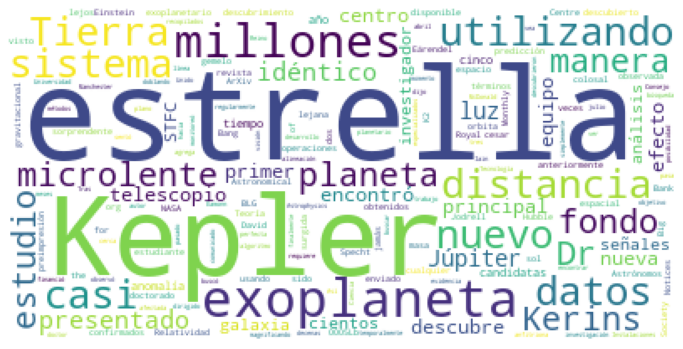

In [8]:

stop_words_sp = set(stopwords.words('spanish'))


df = pd.read_csv('20minutos_1.csv')
df = df[df['Texto'].str.contains('algoritmo')]
texto = df['Texto'].values[0]

texto_wc = WordCloud(background_color = "white",
                     max_words = len(texto),
                     stopwords = stop_words_sp)

texto_wc.generate(texto)

plt.subplots(figsize = (12, 12))
plt.imshow(texto_wc)
plt.axis("off")
plt.show()

- Define una función que eliga al azar **`n`** artículos al azar del fichero **`20minutos_1.csv`** y que muestre para cada articulo:
    - **Titulo, fecha y el WordCloud.**
    
Prueba la función con **`n = 5`**

In [12]:
def cinco_al_azar(file):
    df = pd.read_csv(file)
    df = df.sample(5)
    for row in df.values:
        print(f'Título: {row[4]}')
        print(f'Fecha: {row[1]}')
        texto = row[5]
        texto_wc = WordCloud(background_color = "white",
                     max_words = len(texto),
                     stopwords = stop_words_sp)
        texto_wc.generate(texto)

        plt.subplots(figsize = (12, 12))
        plt.imshow(texto_wc)
        plt.axis("off")
        plt.show()


Título: La valiosa lección de Iñaki Williams a su hermano Nico por quitarse la medalla de subcampeón
Fecha: 17.01.2022


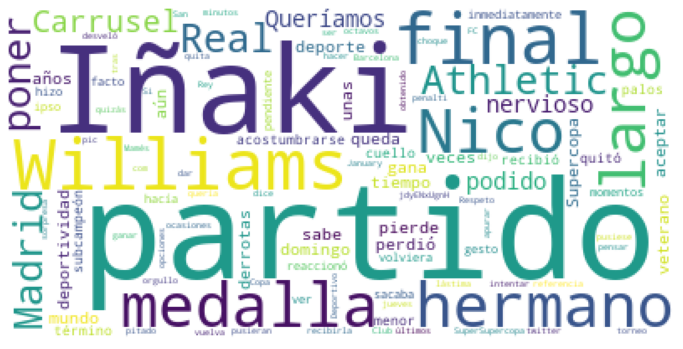

Título: Así se construye una casa prefabricada con impresoras 3D: ¿son el futuro?
Fecha: 03.12.2021


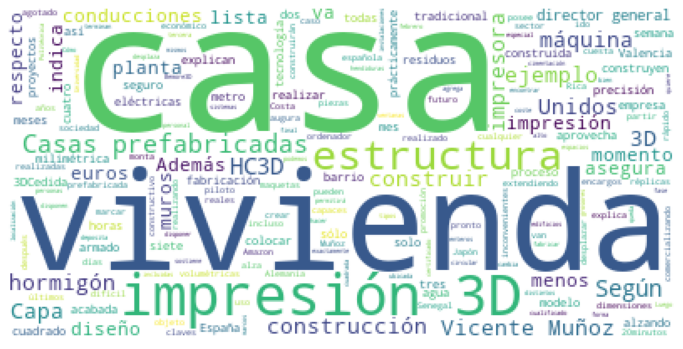

Título: Los volcanes de hielo: los grandes protagonistas del paisaje de una parte del planeta Plutón
Fecha: 29.03.2022


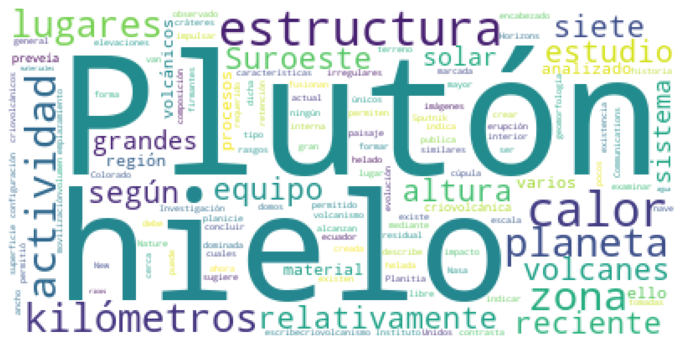

Título: La nueva teoría de los '365 días' que explicaría el misterioso origen de Stonehenge
Fecha: 06.03.2022


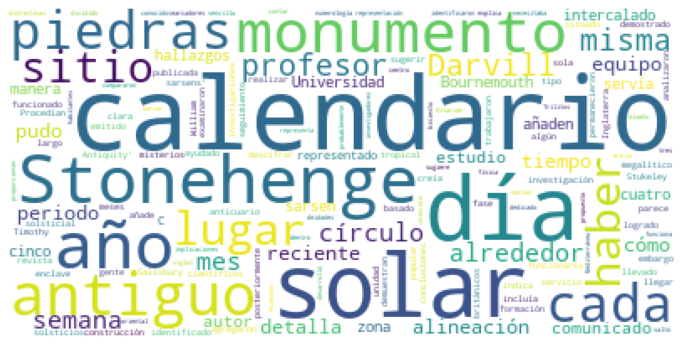

Título: El Ultra de Sierra Nevada responde a las expectativas con una edición de lujo
Fecha: 03.04.2022


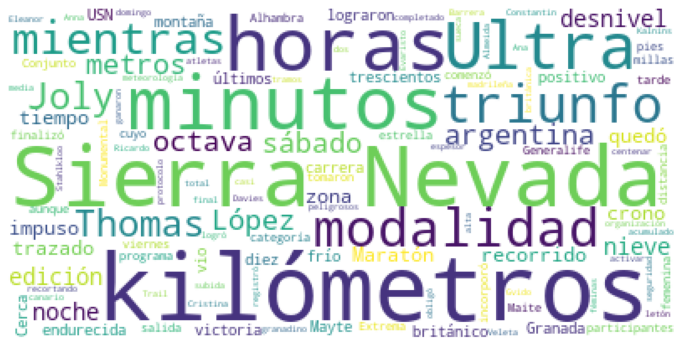

In [14]:
cinco_al_azar('20minutos_1.csv')